## Wine Quality Prediction and Model Evaluation (Logistic Regression)

In [1]:
# Importing libraries and dataset
import dataloader as dl  # module for loading and pre-processing the data
import models_eval as mev  # module for model training and testing

d = dl.load_dataset()
d

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,recommend
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,False
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,False
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,False
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,False
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,False
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,False
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,False
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,True


#### Visualizing the dataset

List of features in the dataset:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']



Correlation Matrix:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.0

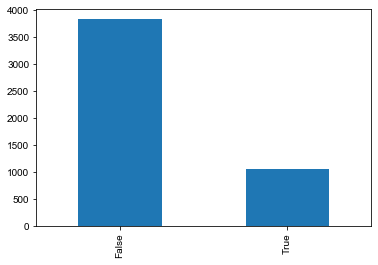

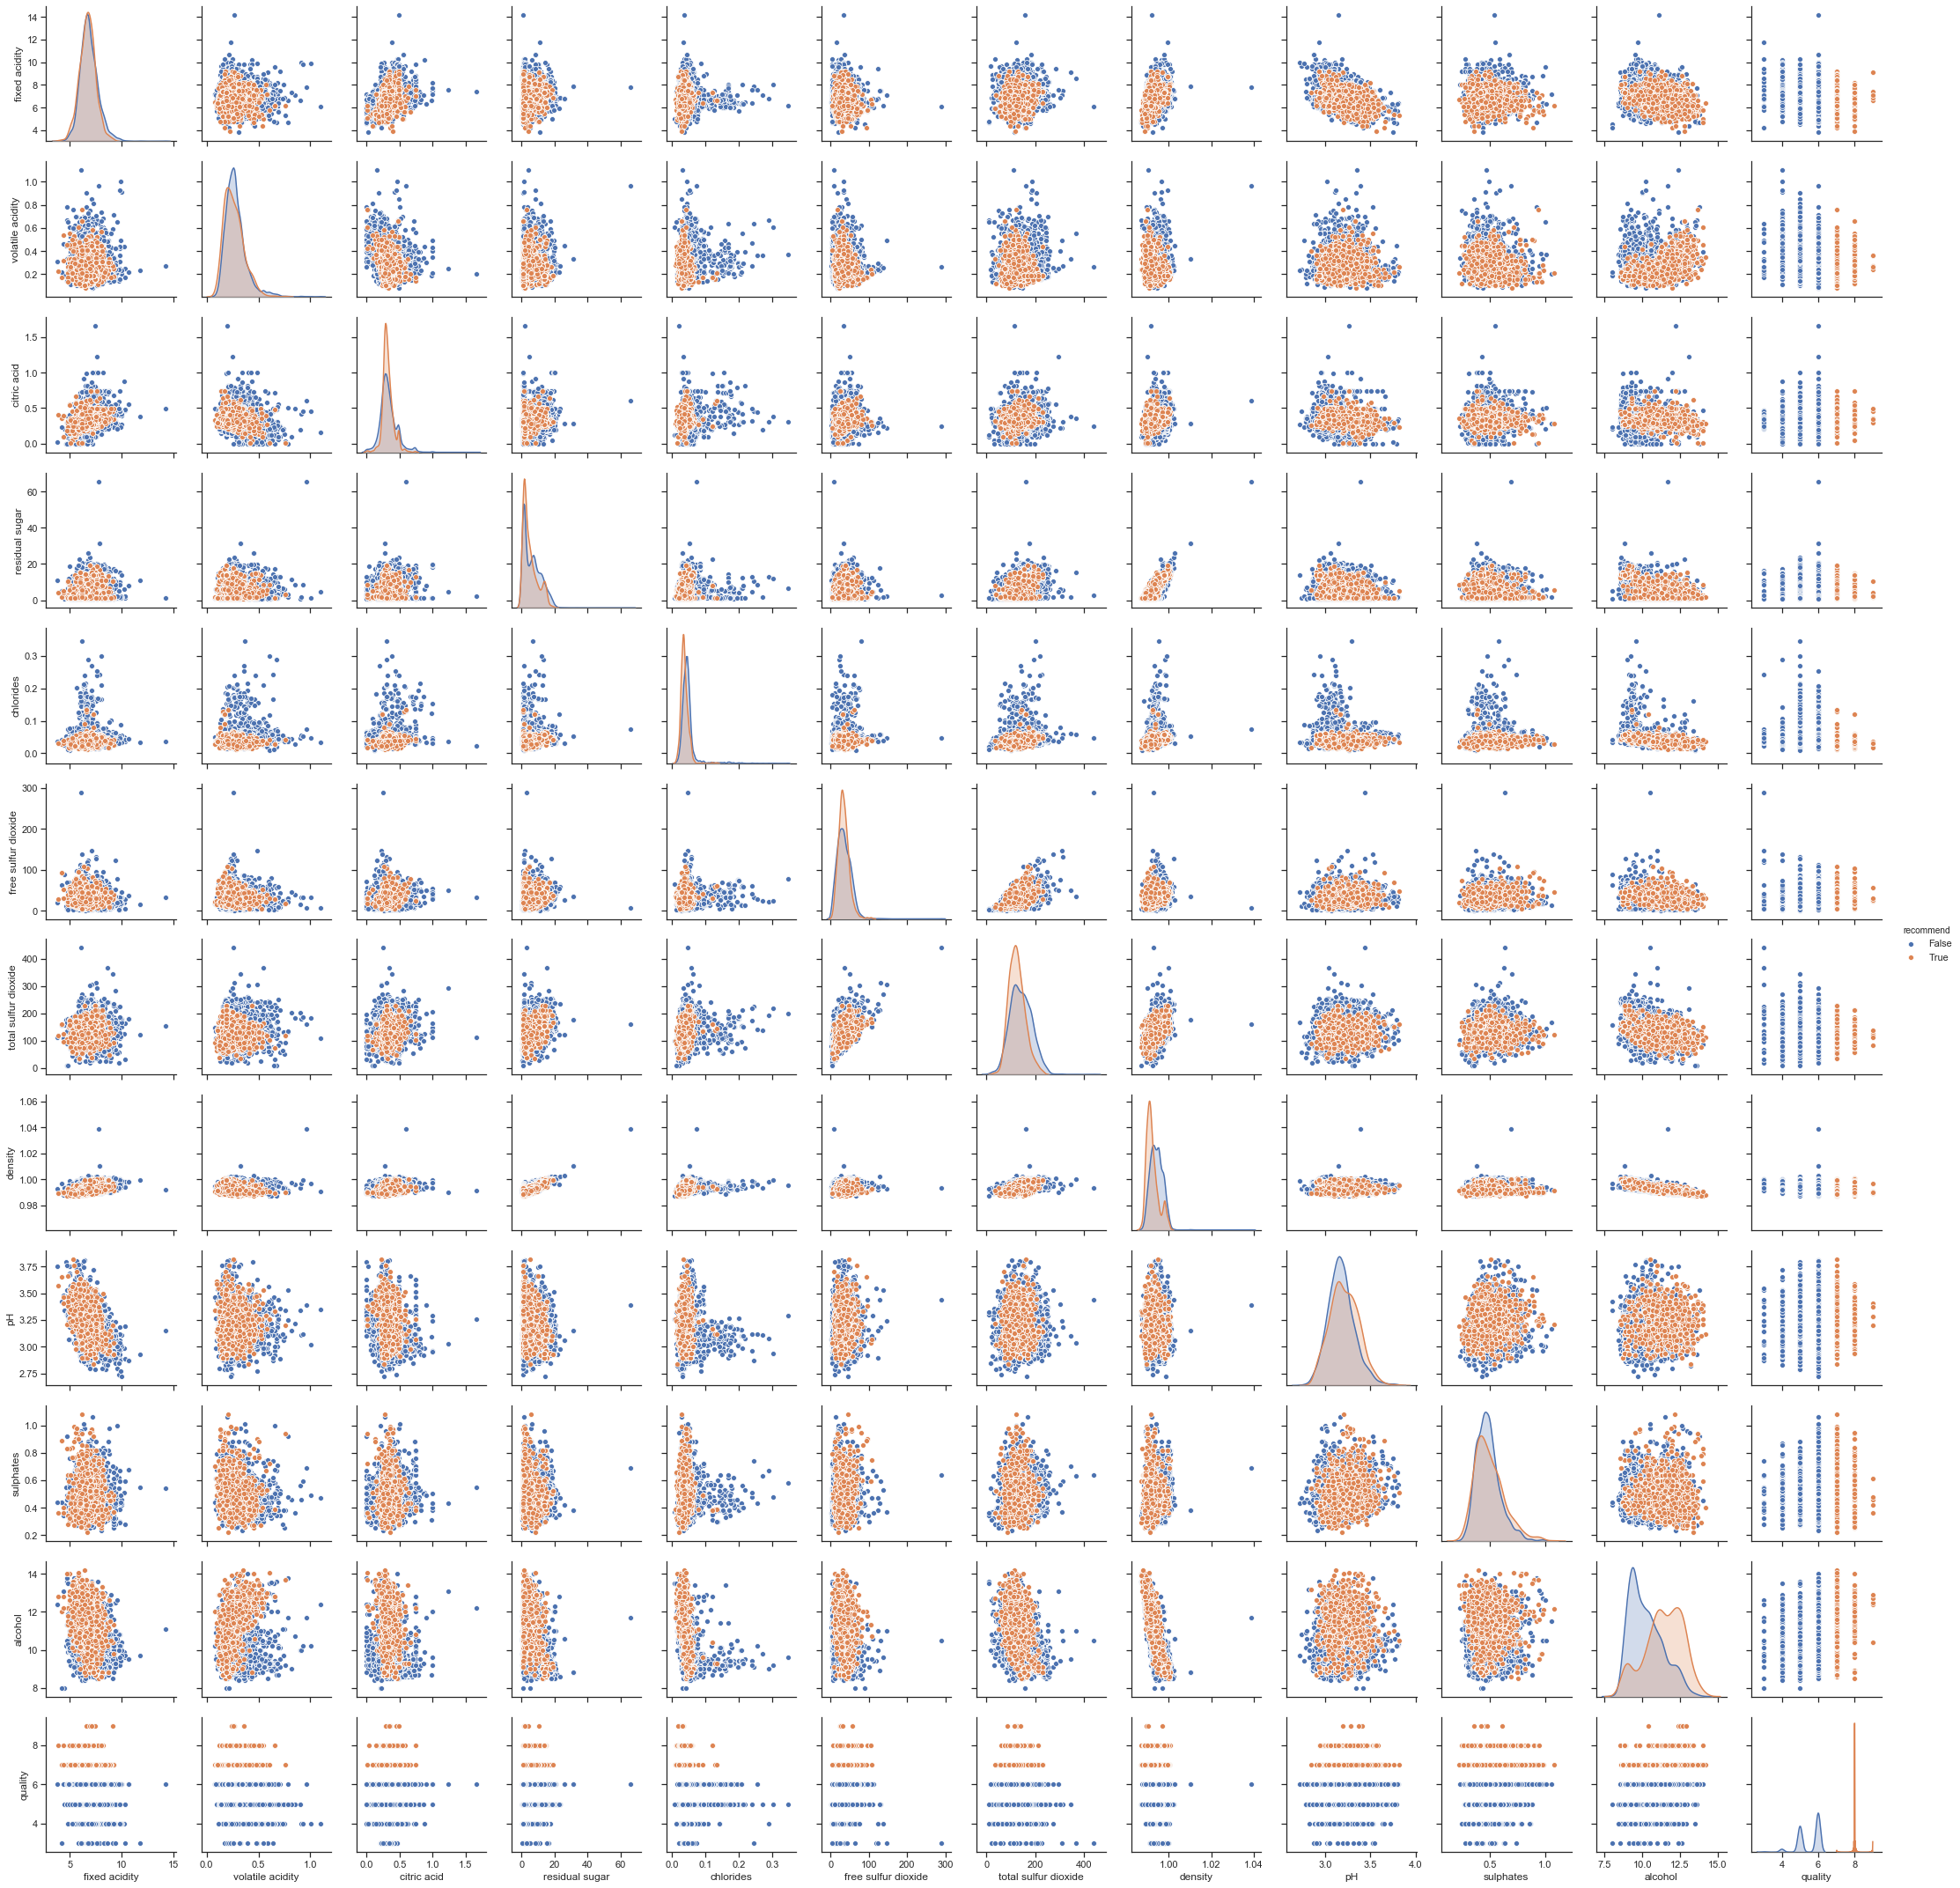

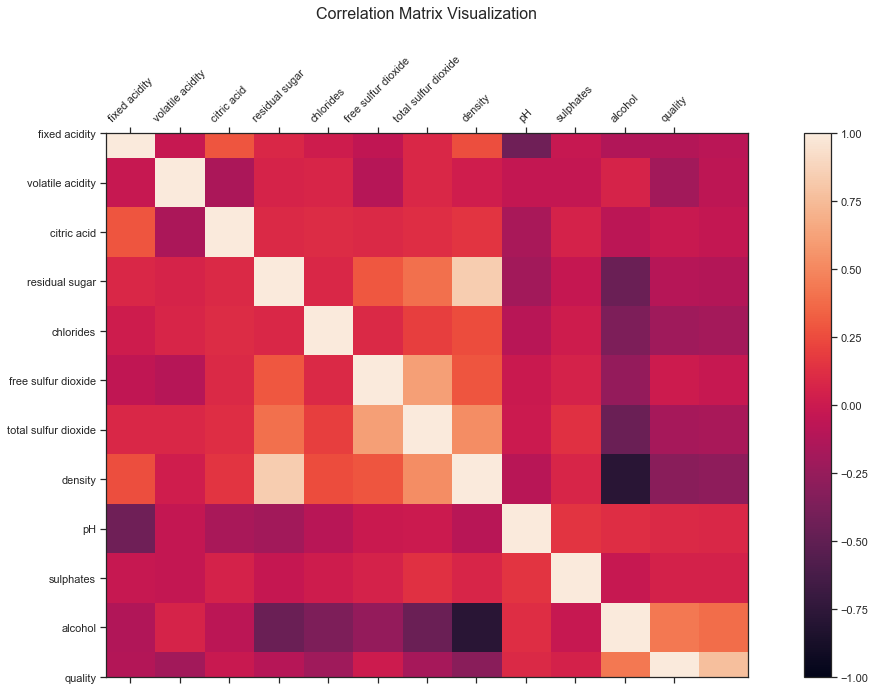

In [2]:
dl.visualize_data(d)

The distribution of both the target labels can be seen above in the bar graph, with higher False labels than the True labels for the 'recommend' column.

In the above pair-waise plot (orange marks -> recommended wine, blue marks -> not recommended wine), it can be seen that **'recommend' is a direct function of 'quality'** (recommend = True for quality >=7; False otherwise), so I want to **exclude quality** from this model that predicts 'recommend'. I'll be using recommend to get a binary prediction. (A multi-class model may also be built to predict 'quality', ignoring 'recommend').

From the correlation matrix above (the printed matrix and the last plot), any specific patterns or high correlation between any two features is not observed so as to take any special measures towards improving the acuracy of the model.

Please right click and view/open the image in a new tab if plot is not clear enough.

#### Preprocessing and Spliting the dataset

In [3]:
x_train, x_test, y_train, y_test = dl.PreProcess_and_Split(d)

StratifiedShuffleSplit(n_splits=1, random_state=0, test_size=0.2,
            train_size=None)


In [4]:
print(dl.pd.Series(y_train).value_counts(normalize=True) * 100)
print(dl.pd.Series(y_test).value_counts(normalize=True) * 100)

False    78.356304
True     21.643696
Name: recommend, dtype: float64
False    78.367347
True     21.632653
Name: recommend, dtype: float64


Using **stratified splitting**, I have split the data to maintain similar proportion of recommended and not recommended wine data in both training and testing sets.

#### Training the classifier model on training set using Logisitc Regression

In [5]:
y_pred = mev.LogReg(x_train, x_test, y_train)  # predicted target values
y_pred

array([False,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,

#### Evaluating the performance

In [6]:
mev.Performance_Eval(y_test, y_pred)

Confusion matrix:
[[723  45]
 [157  55]]



Accuracy Score:
0.7938775510204081 %



Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.94      0.88       768
        True       0.55      0.26      0.35       212

    accuracy                           0.79       980
   macro avg       0.69      0.60      0.61       980
weighted avg       0.76      0.79      0.76       980



It can be seen from the confusion matrix above that type-I errors are 45 and type-II errors are 157 in number out of 980 total number of records in the test data.

Mentioning again, it can be seen that 'recommend' is a direct function of 'quality', so this binary model that predicts 'recommend' **without quality as a feature**.
<br/>
<br/>
This model has an **Accuracy of 79.39%**.
<br/>
The **individual class precision** is: 0.82 for not recommended wine and 0.55 for recommended wine,
<br/>
and the **recall value** is: 0.94 for not recommended wine and 0.26 for recommended wine,
<br/>
giving a **f1-score value** of:  0.88 for not recommended wine and 0.35 for recommended wine.
<br/>
The **macro averages** are:- Precision : 0.69, Recall: 0.60, f1-score: 0.61.
<br/>
The **weighted averages** are:- Precision : 0.76, Recall: 0.79, f1-score: 0.76.
<br/>
